## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

In [1]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

In [2]:
data = pd.DataFrame(pd.read_csv( 'data_000637.txt', sep=",", nrows=16000))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


2\. Find out the value of 'x'

In [3]:
print( data.sort_values(by='BX_COUNTER') ) 

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
2894      1     0           46  3869200196           0         1
14400     1     0           62  3869200311           0        26
8000      1     0           63  3869200247           0        19
14404     1     1           13  3869200311           0        27
13797     1     1           16  3869200305           0        14
14398     1     1            6  3869200311           0        17
14397     1     0           59  3869200311           0        14
15515     1     0          122  3869200322           0         0
128       1     0           74  3869200169           1        18
2891      1     0          103  3869200196           1        24
4748      1     1            2  3869200215           1         2
13793     1     1          139  3869200305           2         0
14395     1     1          139  3869200311           2         0
14399     1     0          139  3869200311           2         0
14408     1     1        

In [4]:
x=data['BX_COUNTER'].max()
print(x)

3563


3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

In [6]:
full_data=pd.read_csv('data_000637.txt', sep=",")
print((full_data['ORBIT_CNT'].max()-full_data['ORBIT_CNT'].min())*x*25/1e9, 's')
#the time is the max-min of orbit, each one updated every x BX_counter which is update every 25 ns

0.9801813 s


4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

In [7]:
data['time']=data['ORBIT_CNT']*data['BX_COUNTER']*25+data['TDC_MEAS']*25/30
#to start count from 0 ns
#data['time']=(data['ORBIT_CNT']-data['ORBIT_CNT'].min())*data['BX_COUNTER']*25+data['TDC_MEAS']*25/30
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,1,0,123,3869200167,2374,26,2.296370e+14
1,1,0,124,3869200167,2374,27,2.296370e+14
2,1,0,63,3869200167,2553,28,2.469517e+14
3,1,0,64,3869200167,2558,19,2.474354e+14
4,1,0,64,3869200167,2760,25,2.669748e+14
5,1,0,63,3869200167,2762,4,2.671683e+14
6,1,0,61,3869200167,2772,14,2.681356e+14
7,1,0,139,3869200167,2776,0,2.685225e+14
8,1,0,62,3869200167,2774,21,2.683290e+14
9,1,0,60,3869200167,2788,7,2.696833e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

In [8]:
data['HEAD']=np.random.randint(2, size=data['HEAD'].count())
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,0,0,123,3869200167,2374,26,2.296370e+14
1,0,0,124,3869200167,2374,27,2.296370e+14
2,0,0,63,3869200167,2553,28,2.469517e+14
3,0,0,64,3869200167,2558,19,2.474354e+14
4,1,0,64,3869200167,2760,25,2.669748e+14
5,0,0,63,3869200167,2762,4,2.671683e+14
6,0,0,61,3869200167,2772,14,2.681356e+14
7,0,0,139,3869200167,2776,0,2.685225e+14
8,0,0,62,3869200167,2774,21,2.683290e+14
9,0,0,60,3869200167,2788,7,2.696833e+14


6\. Create a new DataFrame with only the raws with HEAD=1

In [9]:
head1=data[data['HEAD']==1].copy()
head1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
4,1,0,64,3869200167,2760,25,2.669748e+14
10,1,1,7,3869200167,2785,4,2.693931e+14
11,1,0,64,3869200167,2786,19,2.694898e+14
13,1,0,36,3869200167,2791,23,2.699734e+14
14,1,0,56,3869200167,2789,3,2.697800e+14
15,1,1,139,3869200167,2797,0,2.705538e+14
18,1,1,5,3869200167,2795,4,2.703604e+14
19,1,0,53,3869200167,2796,26,2.704571e+14
21,1,0,57,3869200167,2789,10,2.697800e+14
22,1,0,61,3869200167,2790,23,2.698767e+14


7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

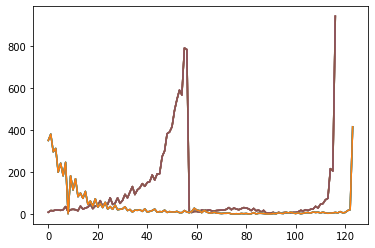

In [10]:
#data[data['TDC_CHANNEL']==1].groupby('TDC_CHANNEL').count()
fpga0=np.array(data[data['FPGA']==0].groupby('TDC_CHANNEL').count())
fpga1=np.array(data[data['FPGA']==1].groupby('TDC_CHANNEL').count())

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(len(fpga0)), fpga0)
plt.plot(np.arange(len(fpga1)), fpga1)
#mettere assi

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [11]:
count= data.groupby(['TDC_CHANNEL']).count()
count= count.sort_values(by=['HEAD'], ascending=False).iloc[:3,0]
print(count)

TDC_CHANNEL
139    1355
64      800
63      796
Name: HEAD, dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [12]:
print(len(np.array(full_data.groupby('ORBIT_CNT').count())))
print(len(np.array(full_data[full_data['TDC_CHANNEL']==139].groupby('ORBIT_CNT').count())))

11001
10976
